In [1]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [13]:
adata = scv.read('/media/chang/HDD-4/chang2/new_macs.h5ad')

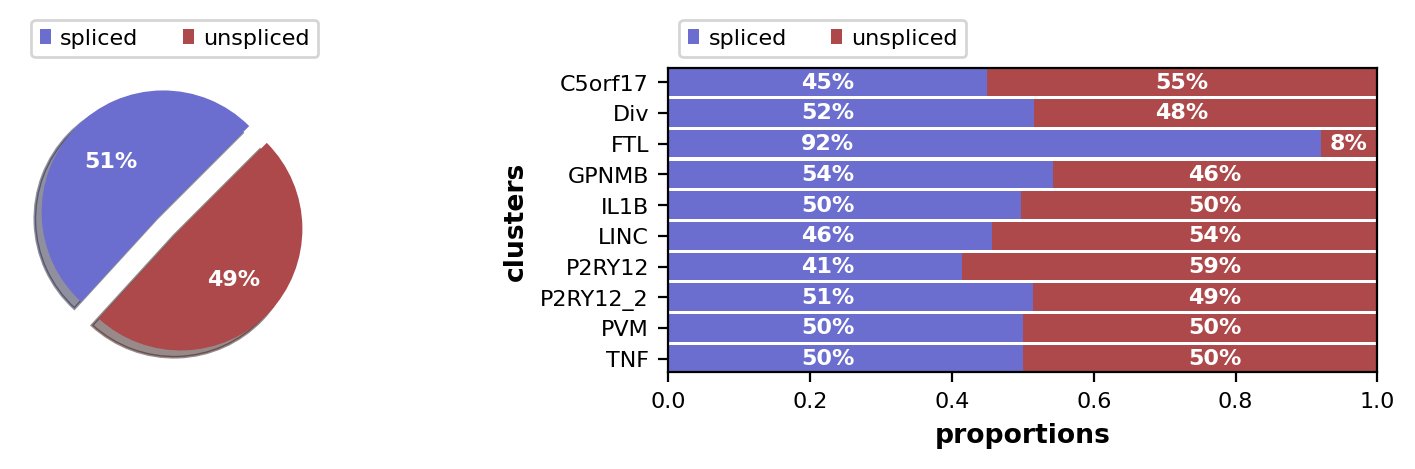

In [14]:
adata.obs['clusters'] = adata.obs['clusters'].astype('category')
scv.pl.proportions(adata, groupby='clusters')

In [15]:
scv.pp.filter_and_normalize(adata, min_shared_counts=10, n_top_genes=3000, enforce=True)

Filtered out 19528 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.


computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


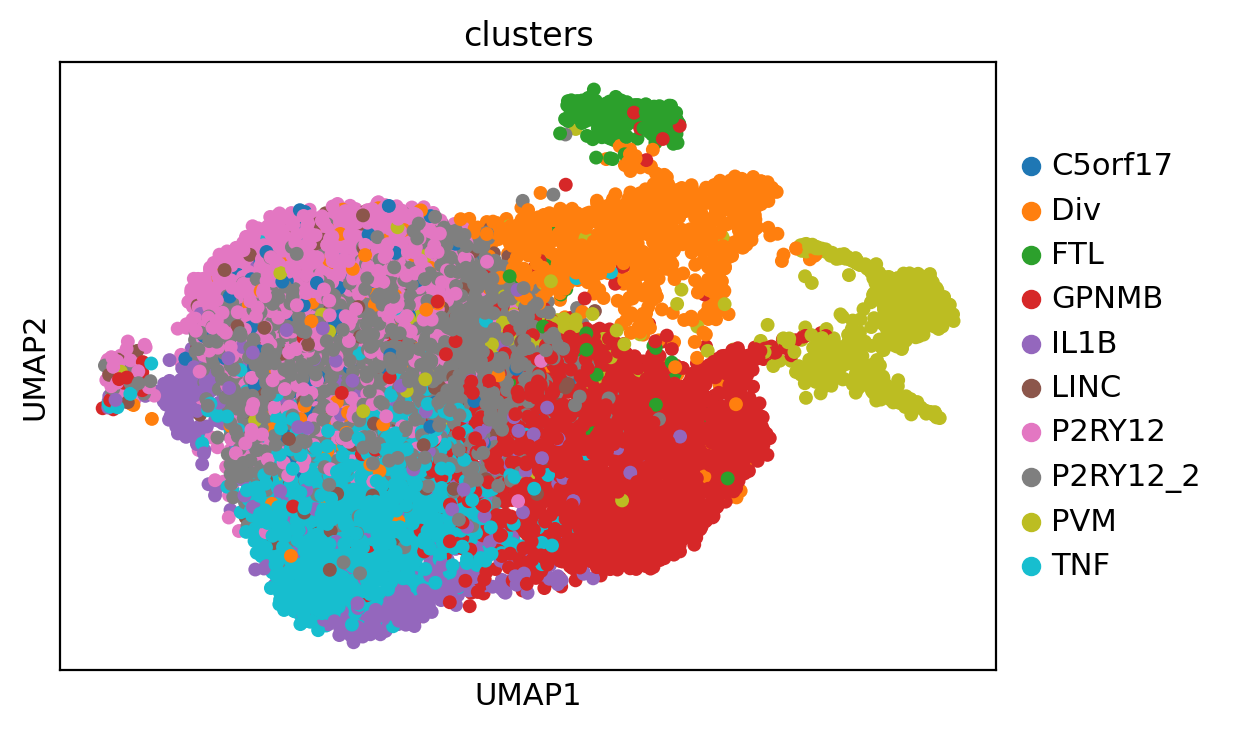

In [16]:
scv.pp.moments(adata, n_pcs=30)
sc.tl.umap(adata, min_dist=.4,)
sc.pl.umap(adata, color=['clusters'], size=100)

In [7]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)



    finished (0:00:47) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


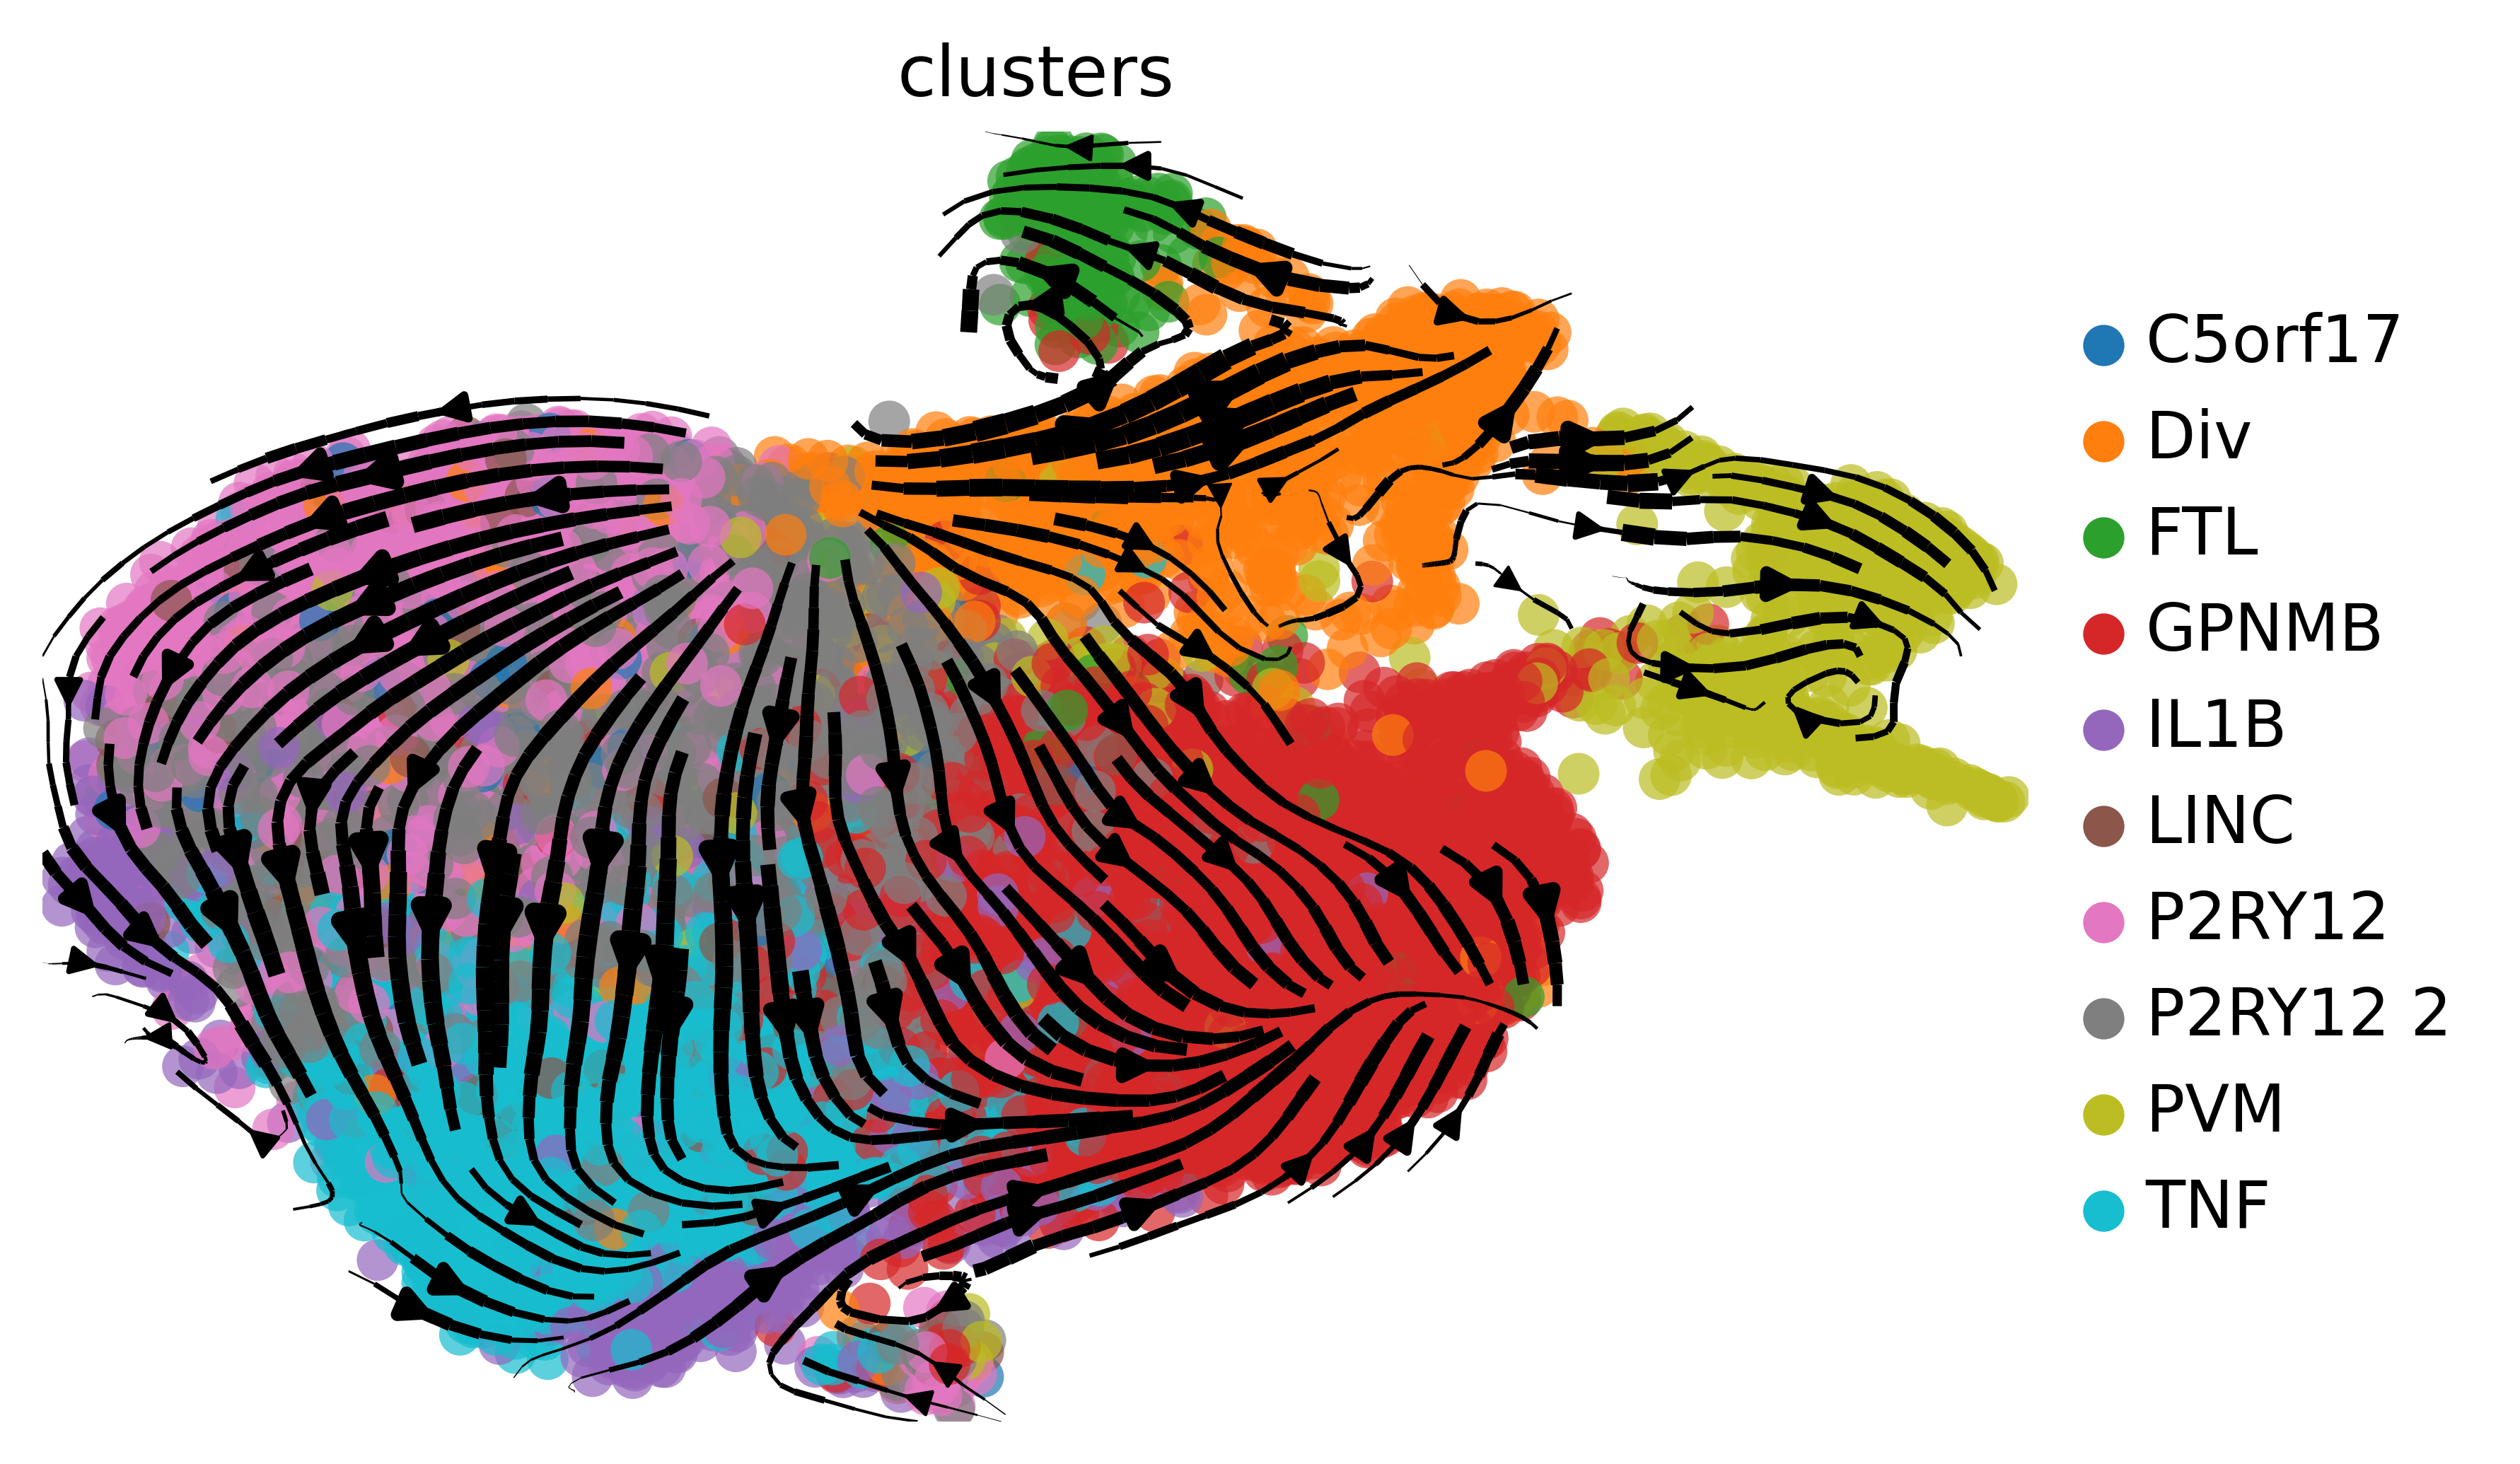

In [12]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2,  alpha=.7, size=200,color='clusters', frameon=False)#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))